In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Number of Nodes:  34


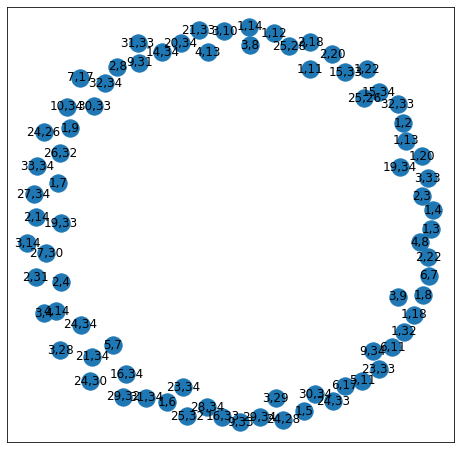

In [2]:
graph = nx.read_gml ('karate.gml', label = 'id') #dataset
n = graph.number_of_nodes()
print("Number of Nodes: ",n)
nx.write_edgelist (graph, 'edge.edgelist', delimiter = ',', data = False)
fh = open("edge.edgelist", 'rb')
edge_list = nx.read_adjlist(fh)
fh.close()
plt.figure(figsize = (8,8))
nx.draw_networkx(edge_list,with_labels = True)

In [3]:
list(edge_list)

['1,2',
 '1,3',
 '1,4',
 '1,5',
 '1,6',
 '1,7',
 '1,8',
 '1,9',
 '1,11',
 '1,12',
 '1,13',
 '1,14',
 '1,18',
 '1,20',
 '1,22',
 '1,32',
 '2,3',
 '2,4',
 '2,8',
 '2,14',
 '2,18',
 '2,20',
 '2,22',
 '2,31',
 '3,4',
 '3,8',
 '3,9',
 '3,10',
 '3,14',
 '3,28',
 '3,29',
 '3,33',
 '4,8',
 '4,13',
 '4,14',
 '5,7',
 '5,11',
 '6,7',
 '6,11',
 '6,17',
 '7,17',
 '9,31',
 '9,33',
 '9,34',
 '10,34',
 '14,34',
 '15,33',
 '15,34',
 '16,33',
 '16,34',
 '19,33',
 '19,34',
 '20,34',
 '21,33',
 '21,34',
 '23,33',
 '23,34',
 '24,26',
 '24,28',
 '24,30',
 '24,33',
 '24,34',
 '25,26',
 '25,28',
 '25,32',
 '26,32',
 '27,30',
 '27,34',
 '28,34',
 '29,32',
 '29,34',
 '30,33',
 '30,34',
 '31,33',
 '31,34',
 '32,33',
 '32,34',
 '33,34']

In [4]:
#list of edges consisting of nodes that are interacting with each other
interactions = []

for edge in edge_list:
    flag=0
    x=''
    y=''
    for ch in edge:
        if ch == ',':
            flag=1
        if flag==0:
            x+=ch
        elif flag==1 and ch!=',':
            y+=ch
    
    u=int(x)
    v=int(y)
    col=[]
    col.append(u)
    col.append(v)
    interactions.append(col)
    
print(interactions)

[[1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7], [1, 8], [1, 9], [1, 11], [1, 12], [1, 13], [1, 14], [1, 18], [1, 20], [1, 22], [1, 32], [2, 3], [2, 4], [2, 8], [2, 14], [2, 18], [2, 20], [2, 22], [2, 31], [3, 4], [3, 8], [3, 9], [3, 10], [3, 14], [3, 28], [3, 29], [3, 33], [4, 8], [4, 13], [4, 14], [5, 7], [5, 11], [6, 7], [6, 11], [6, 17], [7, 17], [9, 31], [9, 33], [9, 34], [10, 34], [14, 34], [15, 33], [15, 34], [16, 33], [16, 34], [19, 33], [19, 34], [20, 34], [21, 33], [21, 34], [23, 33], [23, 34], [24, 26], [24, 28], [24, 30], [24, 33], [24, 34], [25, 26], [25, 28], [25, 32], [26, 32], [27, 30], [27, 34], [28, 34], [29, 32], [29, 34], [30, 33], [30, 34], [31, 33], [31, 34], [32, 33], [32, 34], [33, 34]]


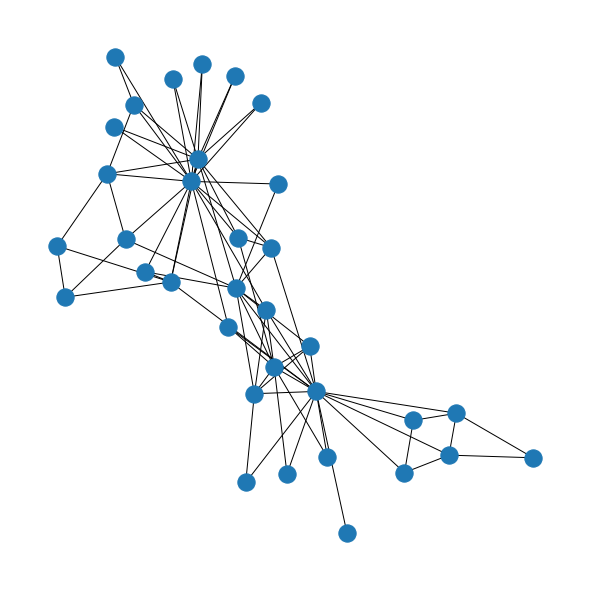

In [5]:
# matrix for number of interaction b/w every u and v
Cascade_event = [[0 for _ in range(n)] for _ in range(n)]
for interaction in interactions:
    Cascade_event[interaction[0]-1][interaction[1]-1]+=1
# print(Cascade_event)
Cascade_event = np.array(Cascade_event)
gra_ph = nx.from_numpy_matrix(Cascade_event)
plt.figure(figsize = (8,8))
nx.draw(gra_ph)

In [6]:
Ua = set()
Ud = set()
for interaction in interactions:
    Ua.add(interaction[0])
    Ud.add(interaction[1])
V = Ua.union(Ud)
print(V)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34}


In [7]:
#Total interactions from u to v plus v to u
C = [[0 for _ in range(n)] for _ in range(n)]
for interaction in interactions:
    C[interaction[0]-1][interaction[1]-1] = Cascade_event[interaction[0]-1][interaction[1]-1]+Cascade_event[interaction[1]-1][interaction[0]-1]
print(C)

[[0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [8]:
c_min=np.min(Cascade_event)
c_max=np.max(Cascade_event)

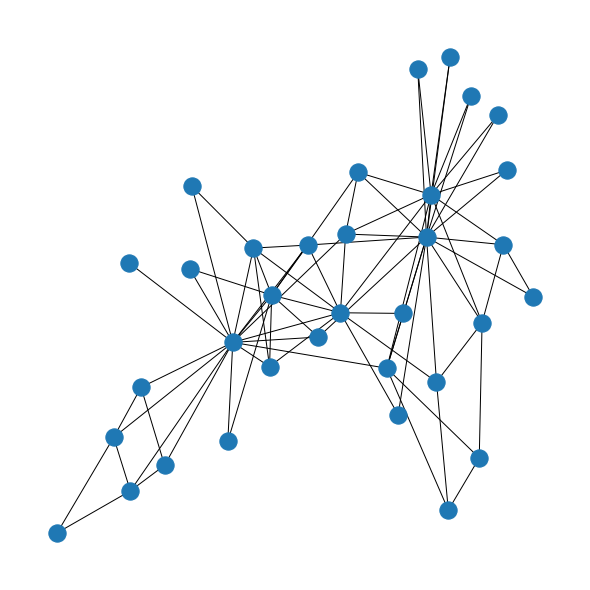

In [9]:
#Interaction weight
W_iuv = [[0 for _ in range(n)] for _ in range(n)]
for interaction in interactions:
    X = ((((C[interaction[0]-1][interaction[1]-1]-c_min)/(c_max-c_min)))-(1/2))*10
    Sigmoid = 1/(1 + np.exp(-X))
    W_iuv[interaction[0]-1][interaction[1]-1] = Sigmoid
# print(W_iuv)
W_iuv = np.array(W_iuv)
gra_ph = nx.from_numpy_matrix(W_iuv)
plt.figure(figsize = (8,8))
nx.draw(gra_ph)

In [10]:
#List & count of common neighbours
list_cmn_neighs = [[0 for _ in range(n)] for _ in range(n)]
cmn_neighs_cnt = [[0 for _ in range(n)] for _ in range(n)]
for interaction in interactions:
    cnt=0
    cmn_neighs_uv = []
    for k in range(0,34):
        if k!=interaction[0]-1 and k!=interaction[1]-1:
            if Cascade_event[k][interaction[0]-1]!=0 and Cascade_event[k][interaction[1]-1]!=0:
                cnt+=1
                cmn_neighs_uv.append(k)
    list_cmn_neighs[interaction[0]-1][interaction[1]-1] = cmn_neighs_uv
    cmn_neighs_cnt[interaction[0]-1][interaction[1]-1] = cnt
# print(cmn_neighs_cnt)
print(list_cmn_neighs)

[[0, [], [], [], [], [], [], [], [], 0, [], [], [], [], 0, 0, 0, [], 0, [], 0, [], 0, 0, 0, 0, 0, 0, 0, 0, 0, [], 0, 0], [0, 0, [0], [0], 0, 0, 0, [0], 0, 0, 0, 0, 0, [0], 0, 0, 0, [0], 0, [0], 0, [0], 0, 0, 0, 0, 0, 0, 0, 0, [], 0, 0, 0], [0, 0, 0, [0, 1], 0, 0, 0, [0, 1], [0], [], 0, 0, 0, [0, 1], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, [], [], 0, 0, 0, [], 0], [0, 0, 0, 0, 0, 0, 0, [0, 1, 2], 0, 0, 0, 0, [0], [0, 1, 2], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, [0], 0, 0, 0, [0], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, [0], 0, 0, 0, [0], 0, 0, 0, 0, 0, [], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, [5], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

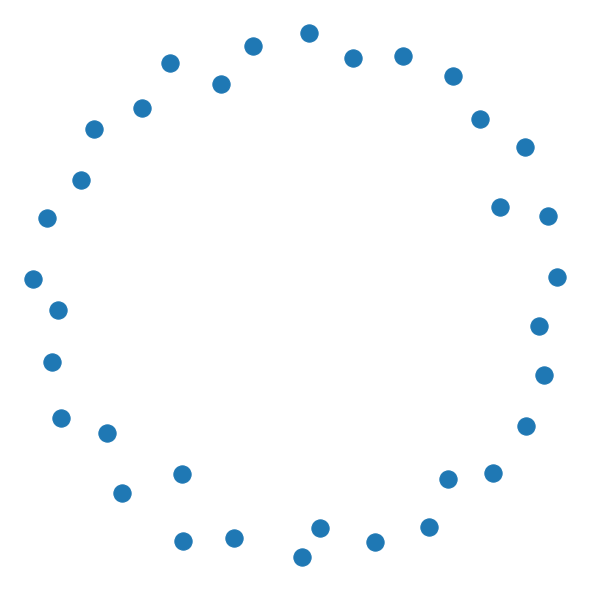

In [11]:
#Group Behaviour Weight
W_guv = [[0 for _ in range(n)] for _ in range(n)]
for interaction in interactions:
    sum = 0
    d = cmn_neighs_cnt[interaction[0]-1][interaction[1]-1]
    if d != 0:
        for j in range(0,d):
            g = list_cmn_neighs[interaction[0]-1][interaction[1]-1][j]
            sum += min(W_iuv[interaction[0]-1][g], W_iuv[interaction[1]-1][g])
        W_guv[interaction[0]-1][interaction[1]-1] = sum/d
W_guv = np.array(W_guv)
gra_ph = nx.from_numpy_matrix(W_guv)
plt.figure(figsize = (8,8))
nx.draw(gra_ph)
# print(W_guv)

In [12]:
alpha = 0.8 # alpha value close to 1
#Overall Weight
W_uv = [[0 for _ in range(n)] for _ in range(n)]
for interaction in interactions:
    W_uv[interaction[0]-1][interaction[1]-1] = alpha*W_iuv[interaction[0]-1][interaction[1]-1] + (1-alpha)*W_guv[interaction[0]-1][interaction[1]-1]
W_uv = np.array(W_uv)
print(W_uv)

[[0.         0.79464572 0.79464572 ... 0.79464572 0.         0.        ]
 [0.         0.         0.79464572 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.79464572 0.        ]
 ...
 [0.         0.         0.         ... 0.         0.79464572 0.79464572]
 [0.         0.         0.         ... 0.         0.         0.79464572]
 [0.         0.         0.         ... 0.         0.         0.        ]]


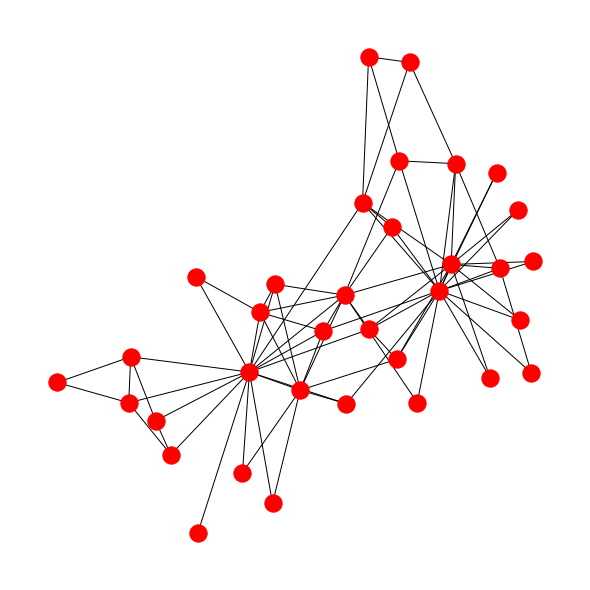

In [13]:
# Event Graph
EG = nx.from_numpy_matrix(W_uv)
plt.figure(figsize = (8,8))
nx.draw(EG, node_color='red')

In [14]:
W = np.sum(W_uv)
print(W)

61.98236610232464


In [15]:
K = []
for i in range(0,len(V)):
    sum=0
    for interaction in interactions:
        sum += W_uv[i][interaction[1]-1]
    K.append(sum)
print(K)

[29.40189161264117, 16.687560104472016, 23.044725858556593, 7.946457192605721, 4.767874315563433, 6.357165754084577, 1.5892914385211445, 0.0, 23.839371577817165, 13.508977227429726, 0.0, 0.0, 0.0, 13.508977227429726, 22.25008013929602, 22.25008013929602, 0.0, 0.0, 22.25008013929602, 13.508977227429726, 22.25008013929602, 0.0, 22.25008013929602, 27.812600174120025, 7.151811473345149, 3.178582877042289, 15.09826866595087, 13.508977227429726, 16.687560104472016, 22.25008013929602, 22.25008013929602, 22.25008013929602, 13.508977227429726, 0.0]
